In [1]:
import os
from pathlib import Path
os.chdir("/Users/mregan/Dev/litmus/")
print(Path.cwd())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

/Users/mregan/Dev/litmus


In [2]:
import pandas as pd
import numpy as np

from user_data.litmus import get_labeled_data
from user_data.litmus import meta_model

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [3]:
ld = get_labeled_data.GetLabeledData(
    timeframe='5m',
    latest=True)

In [4]:
df = ld.get_all_data()
df

open     high      low  \
strategy    pair       date                                                   
KamaPrimary 1INCH/USDT 2021-01-01 06:55:00+00:00  1.24190  1.25490  1.24170   
                       2021-01-01 12:25:00+00:00  1.16460  1.17490  1.16460   
                       2021-01-01 12:45:00+00:00  1.16310  1.16880  1.16310   
                       2021-01-01 14:25:00+00:00  1.16490  1.17500  1.16280   
                       2021-01-01 22:00:00+00:00  1.12750  1.13260  1.12710   
...                                                   ...      ...      ...   
            XRP/USDT   2021-02-10 22:05:00+00:00  0.49741  0.50000  0.49722   
                       2021-02-10 22:20:00+00:00  0.50074  0.50309  0.50046   
                       2021-02-10 22:50:00+00:00  0.50451  0.51101  0.50304   
                       2021-02-10 23:10:00+00:00  0.51060  0.51440  0.50961   
                       2021-02-11 00:25:00+00:00  0.51336  0.51634  0.51213   

                                                    close      volume  \
strategy    pair       date                                             
KamaPrimary 1INCH/USDT 2021-01-01 06:55:00+00:00  1.24810    53776.62   
                       2021-01-01 12:25:00+00:00  1.17390    20212.36   
                       2021-01-01 12:45:00+00:00  1.16840    18174.99   
                       2021-01-01 14:25:00+00:00  1.17280    49317.45   
                       2021-01-01 22:00:00+00:00  1.13220     7110.76   
...                                                   ...         ...   
            XRP/USDT   2021-02-10 22:05:00+00:00  0.49971  2247695.30   
                       2021-02-10 22:20:00+00:00  0.50309  1790361.80   
                       2021-02-10 22:50:00+00:00  0.50932  7701063.40   
                       2021-02-10 23:10:00+00:00  0.51278  4988667.80   
                       2021-02-11 00:25:00+00:00  0.51437  4844594.50   

                                                    volume_adi    volume_obv  \
strategy    pair       date                                                    
KamaPrimary 1INCH/USDT 2021-01-01 06:55:00+00:00  3.200086e+05  2.313731e+05   
                       2021-01-01 12:25:00+00:00 -5.394046e+05 -1.864251e+06   
                       2021-01-01 12:45:00+00:00 -5.209217e+05 -1.906560e+06   
                       2021-01-01 14:25:00+00:00 -7.050236e+05 -1.819473e+06   
                       2021-01-01 22:00:00+00:00 -1.612125e+05 -2.069637e+06   
...                                                        ...           ...   
            XRP/USDT   2021-02-10 22:05:00+00:00  1.340281e+09 -3.385195e+08   
                       2021-02-10 22:20:00+00:00  1.341664e+09 -3.360318e+08   
                       2021-02-10 22:50:00+00:00  1.348910e+09 -3.276870e+08   
                       2021-02-10 23:10:00+00:00  1.353451e+09 -3.200218e+08   
                       2021-02-11 00:25:00+00:00  1.335460e+09 -3.193863e+08   

                                                  volume_cmf    volume_fi  \
strategy    pair       date                                                 
KamaPrimary 1INCH/USDT 2021-01-01 06:55:00+00:00   -0.077845   144.296304   
                       2021-01-01 12:25:00+00:00    0.016859   -34.953536   
                       2021-01-01 12:45:00+00:00    0.122152   -53.960151   
                       2021-01-01 14:25:00+00:00   -0.199164    94.233506   
                       2021-01-01 22:00:00+00:00    0.103329    16.140332   
...                                                      ...          ...   
            XRP/USDT   2021-02-10 22:05:00+00:00    0.097022  2281.908402   
                       2021-02-10 22:20:00+00:00    0.219628  2439.876226   
                       2021-02-10 22:50:00+00:00    0.282826  7097.223074   
                       2021-02-10 23:10:00+00:00    0.238512  5187.991936   
                       2021-02-11 00:25:00+00:00   -0.095571  2545.707323   

                                

In [5]:
df['exit_reason'].value_counts()

vertical_barrier_force_sell    5372
upper_barrier_pt_sell          3148
lower_barrier_sl_sell           927
Name: exit_reason, dtype: int64

In [6]:
# Tripple barrier target setting method

tbm_target = 'upper_based'

if tbm_target == 'upper_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['exit_reason'].isin(['upper_barrier_pt_sell']), True, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['lower_barrier_sl_sell', 'vertical_barrier_force_sell']), False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])

elif tbm_target == 'sign_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['profit_ratio'] > 0, True, df['y_true'])
    df['y_true'] = np.where(df['profit_ratio'] <= 0, False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])
    
df['y_true'].value_counts()

0.0    6299
1.0    3148
Name: y_true, dtype: int64

In [7]:
df['y_pred'] = True

In [8]:
# Train ML model to predict 'correct_trade'

model_features = ['kama', 'kama_delta', 'kama_threshold']

pair_only_features = [
       'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt',  'volume_mfi',
       'volatility_bbw', 'volatility_bbp',  'volatility_kcw', 'volatility_kcp',
       'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd_diff', 
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_mass_index',
       'trend_dpo', 'trend_kst_diff',
       'trend_stc', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_cci', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind',
       'momentum_rsi', 'momentum_stoch_rsi', 'momentum_stoch_rsi_k',
       'momentum_stoch_rsi_d', 'momentum_tsi', 'momentum_uo',
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_roc', 'momentum_ppo',
       'momentum_ppo_signal', 'momentum_ppo_hist', 'momentum_pvo',
       'momentum_pvo_signal', 'momentum_pvo_hist',
       'others_dr', 'others_dlr']

btc_5m = ['volume_cmf_btc_5m', 'volume_fi_btc_5m', 'volume_em_btc_5m', 'volume_vpt_btc_5m',
        'volume_mfi_btc_5m',
       'volatility_bbw_btc_5m',
       'volatility_bbp_btc_5m',
       'volatility_kcw_btc_5m', 'volatility_kcp_btc_5m', 'volatility_dcw_btc_5m',
       'volatility_dcp_btc_5m',
       'volatility_ui_btc_5m', 'trend_macd_btc_5m',
       'trend_macd_diff_btc_5m',
       'trend_vortex_ind_pos_btc_5m', 'trend_vortex_ind_neg_btc_5m',
       'trend_vortex_ind_diff_btc_5m', 'trend_trix_btc_5m',
       'trend_mass_index_btc_5m', 'trend_dpo_btc_5m',
       'trend_kst_btc_5m', 'trend_kst_sig_btc_5m',
       'trend_kst_diff_btc_5m', 'trend_stc_btc_5m',
       'trend_adx_btc_5m', 'trend_adx_pos_btc_5m',
       'trend_adx_neg_btc_5m', 'trend_cci_btc_5m',
       'trend_aroon_up_btc_5m',
       'trend_aroon_down_btc_5m', 'trend_aroon_ind_btc_5m',
       'momentum_rsi_btc_5m',
       'momentum_stoch_rsi_btc_5m', 'momentum_stoch_rsi_k_btc_5m',
       'momentum_stoch_rsi_d_btc_5m', 'momentum_tsi_btc_5m',
       'momentum_uo_btc_5m', 'momentum_stoch_btc_5m',
       'momentum_stoch_signal_btc_5m', 'momentum_wr_btc_5m',
       'momentum_ao_btc_5m', 'momentum_roc_btc_5m',
       'momentum_ppo_btc_5m',
       'momentum_ppo_hist_btc_5m', 'momentum_pvo_btc_5m',
       'momentum_pvo_signal_btc_5m', 'momentum_pvo_hist_btc_5m',
       'others_dr_btc_5m', 'others_dlr_btc_5m']

btc_1h = ['volume_cmf_btc_1h', 'volume_fi_btc_1h', 'volume_em_btc_1h', 'volume_vpt_btc_1h',
        'volume_mfi_btc_1h',
       'volatility_bbw_btc_1h',
       'volatility_bbp_btc_1h',
       'volatility_kcw_btc_1h', 'volatility_kcp_btc_1h', 'volatility_dcw_btc_1h',
       'volatility_dcp_btc_1h',
       'volatility_ui_btc_1h', 'trend_macd_btc_1h',
       'trend_macd_diff_btc_1h',
       'trend_vortex_ind_pos_btc_1h', 'trend_vortex_ind_neg_btc_1h',
       'trend_vortex_ind_diff_btc_1h', 'trend_trix_btc_1h',
       'trend_mass_index_btc_1h', 'trend_dpo_btc_1h',
       'trend_kst_btc_1h', 'trend_kst_sig_btc_1h',
       'trend_kst_diff_btc_1h', 'trend_stc_btc_1h',
       'trend_adx_btc_1h', 'trend_adx_pos_btc_1h',
       'trend_adx_neg_btc_1h', 'trend_cci_btc_1h',
       'trend_aroon_up_btc_1h',
       'trend_aroon_down_btc_1h', 'trend_aroon_ind_btc_1h',
       'momentum_rsi_btc_1h',
       'momentum_stoch_rsi_btc_1h', 'momentum_stoch_rsi_k_btc_1h',
       'momentum_stoch_rsi_d_btc_1h', 'momentum_tsi_btc_1h',
       'momentum_uo_btc_1h', 'momentum_stoch_btc_1h',
       'momentum_stoch_signal_btc_1h', 'momentum_wr_btc_1h',
       'momentum_ao_btc_1h', 'momentum_roc_btc_1h',
       'momentum_ppo_btc_1h',
       'momentum_ppo_hist_btc_1h', 'momentum_pvo_btc_1h',
       'momentum_pvo_signal_btc_1h', 'momentum_pvo_hist_btc_1h',
       'others_dr_btc_1h', 'others_dlr_btc_1h']


all_features = pair_only_features + btc_5m + btc_1h + model_features

In [9]:
# Drop BTC

df = df.drop('BTC/USDT', level='pair', axis=0)

In [10]:
# Limit training data so we can backest with holdout
idx = pd.IndexSlice

model = meta_model.MetaModel(data=df.loc[idx[:, :, :]], 
                     X_features_num=all_features,
                     X_features_cat=['pair_copy'],
                     y_pred_col='y_pred', 
                     y_true_col='y_true',
                     sample_weight_col='profit_ratio')

In [11]:
model.check_data()

DataFrame contains NaNs which should be addressed before proceeding 

List of features with NaNs are: 

volume_em_btc_5m    3
dtype: int64

To remove rows with these NaN, call clean_data()


In [12]:
model.clean_data()

Removed 1 NaN / Infinity observations from DataFrame


In [13]:
model.classification_report(model='primary')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5712
         1.0       0.35      1.00      0.52      3054

    accuracy                           0.35      8766
   macro avg       0.17      0.50      0.26      8766
weighted avg       0.12      0.35      0.18      8766



In [14]:
model.run_cross_validation(cv_n_splits=7, cv_gap=40)

Train: 2021-01-01 2021-01-05 Test: 2021-01-05 2021-01-10
Train: 2021-01-04 2021-01-10 Test: 2021-01-10 2021-01-16
Train: 2021-01-09 2021-01-15 Test: 2021-01-16 2021-01-21
Train: 2021-01-15 2021-01-21 Test: 2021-01-21 2021-01-26
Train: 2021-01-20 2021-01-26 Test: 2021-01-26 2021-02-01
Train: 2021-01-25 2021-01-31 Test: 2021-02-01 2021-02-06
Train: 2021-01-31 2021-02-05 Test: 2021-02-06 2021-02-11


In [15]:
model.classification_report(model='meta')

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      5062
         1.0       1.00      0.00      0.00      2603

    accuracy                           0.66      7665
   macro avg       0.83      0.50      0.40      7665
weighted avg       0.78      0.66      0.53      7665



In [20]:
model.get_most_important_features(cv_n_splits=7, cv_gap=40, cv_sample=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.2min finished

[2022-05-31 00:22:13] Features: 1/160 -- score: 0.5230617455128012[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:  1.2min finished

[2022-05-31 00:23:23] Features: 2/160 -- score: 0.5409665447683435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:  1.1min finished

[2022-05-31 00:24:29] Features: 3/160 -- score: 0.5413340009003879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 15

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  1.3min finished

[2022-05-31 01:01:18] Features: 31/160 -- score: 0.5952456347640804[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:  1.3min finished

[2022-05-31 01:02:38] Features: 32/160 -- score: 0.594484351397604[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  1.3min finished

[2022-05-31 01:03:57] Features: 33/160 -- score: 0.5990914245613619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:  1.3min finished

[2022-05-31 01:05:15] Features: 3

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished

[2022-05-31 01:40:19] Features: 61/160 -- score: 0.5945193378677729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  1.2min finished

[2022-05-31 01:41:29] Features: 62/160 -- score: 0.5929911961150764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:  1.2min finished

[2022-05-31 01:42:38] Features: 63/160 -- score: 0.5903136887968425[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:  1.2min finished

[2022-05-31 01:43:53] Features: 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   56.6s finished

[2022-05-31 02:12:56] Features: 91/160 -- score: 0.5863719779913349[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:   56.2s finished

[2022-05-31 02:13:52] Features: 92/160 -- score: 0.5852807550070455[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:   55.9s finished

[2022-05-31 02:14:48] Features: 93/160 -- score: 0.58509680974225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:   54.5s finished

[2022-05-31 02:15:43] Features: 94

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   39.0s finished

[2022-05-31 02:33:15] Features: 116/160 -- score: 0.5844029268340083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  36 out of  44 | elapsed:   38.1s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   38.8s finished

[2022-05-31 02:33:54] Features: 117/160 -- score: 0.5816644063565501[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  34 out of  43 | elapsed:   38.0s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   38.4s finished

[2022-05-31 02:34:32] Features: 118/160 -- score: 0.5828329933470737[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.9s
[

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.0s finished

[2022-05-31 02:45:34] Features: 141/160 -- score: 0.5811932658495387[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:   14.5s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   17.8s finished

[2022-05-31 02:45:52] Features: 142/160 -- score: 0.5733448708489606[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   14.0s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   17.2s finished

[2022-05-31 02:46:09] Features: 143/160 -- score: 0.5821593124387102[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:   14.8s remaining:   48.1s
[Parallel(n_jobs=-1)]: Done  13 out of  17 | elapsed:   16.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Do

The top most important features are:
['onehotencoder__pair_copy_AVAX/USDT' 'onehotencoder__pair_copy_LINK/USDT'
 'onehotencoder__pair_copy_XRP/USDT' 'remainder__volume_cmf'
 'remainder__volatility_dcw' 'remainder__volatility_dcp'
 'remainder__trend_stc' 'remainder__trend_adx_pos'
 'remainder__momentum_rsi' 'remainder__momentum_stoch_rsi_k'
 'remainder__momentum_stoch' 'remainder__momentum_stoch_signal'
 'remainder__momentum_ppo' 'remainder__momentum_pvo'
 'remainder__volume_em_btc_5m' 'remainder__volatility_bbw_btc_5m'
 'remainder__volatility_dcw_btc_5m' 'remainder__volatility_dcp_btc_5m'
 'remainder__trend_vortex_ind_neg_btc_5m' 'remainder__trend_kst_btc_5m'
 'remainder__trend_kst_diff_btc_5m' 'remainder__trend_adx_btc_5m'
 'remainder__trend_aroon_up_btc_5m' 'remainder__momentum_uo_btc_5m'
 'remainder__momentum_wr_btc_5m' 'remainder__momentum_roc_btc_5m'
 'remainder__momentum_pvo_signal_btc_5m' 'remainder__others_dr_btc_5m'
 'remainder__volume_fi_btc_1h' 'remainder__volume_mfi_btc_1h'

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished

[2022-05-31 02:48:48] Features: 160/160 -- score: 0.5557514846656988

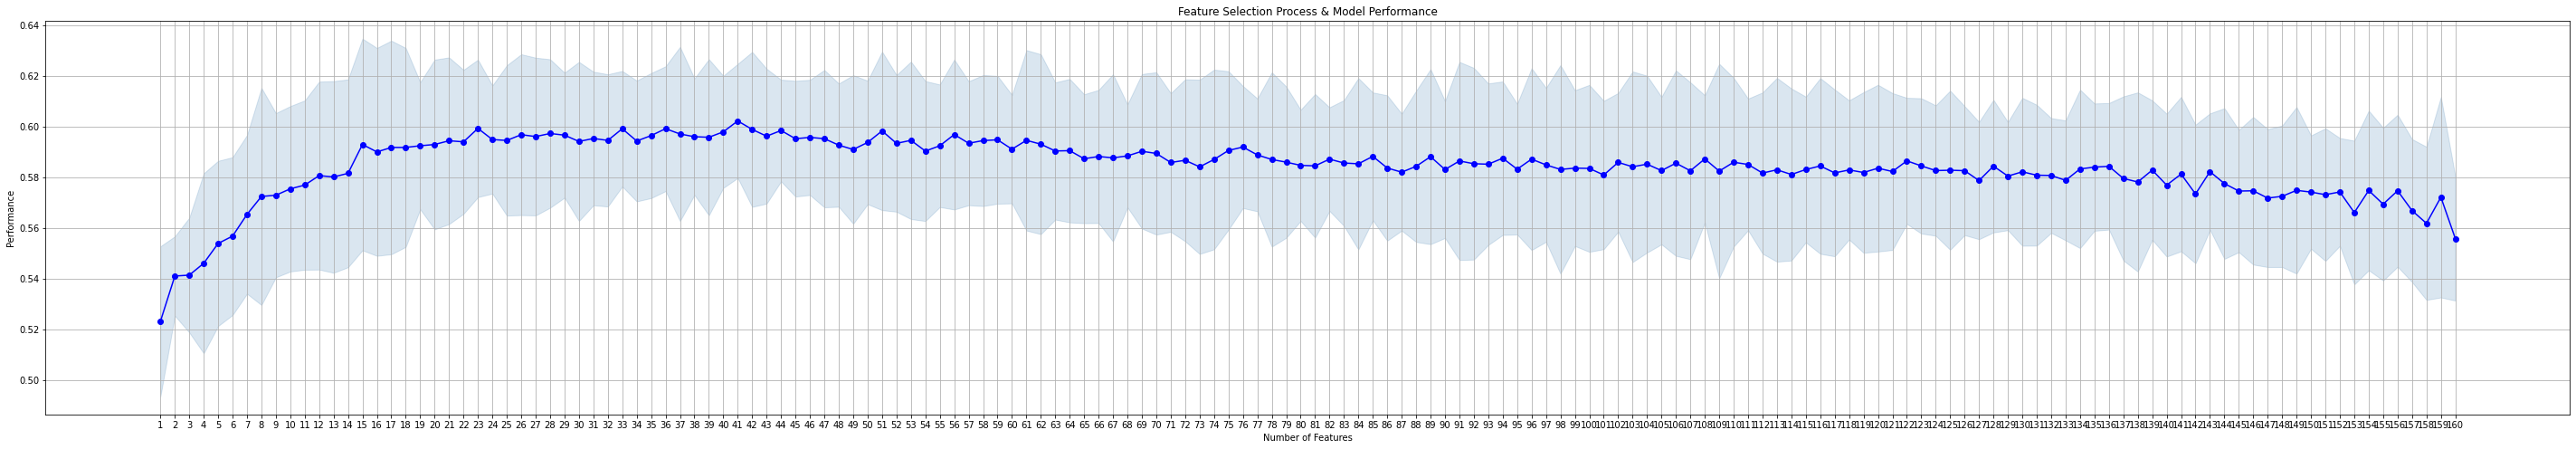

In [21]:
model.plot_feature_selection(figsize=(50, 8))

In [ ]:
best_features_df = pd.DataFrame.from_dict(model.clf.named_steps['feature_selection'].get_metric_dict()).T
best_features_df

In [22]:
top_features = []
prev_features = []

for k, v in model.clf.named_steps['feature_selection'].subsets_.items():
    current_features = list(v['feature_idx'])
    current_features = [i for i in current_features if i not in prev_features]
    top_features += current_features
    prev_features = list(v['feature_idx'])
    
ranked_top_features = model.X_transformed_features[[top_features]]
ranked_top_features

array(['remainder__momentum_uo_btc_5m', 'remainder__trend_stc_btc_1h',
       'remainder__momentum_roc_btc_5m',
       'remainder__volatility_bbw_btc_5m',
       'remainder__momentum_stoch_rsi_btc_1h', 'remainder__trend_stc',
       'remainder__momentum_stoch_rsi_k_btc_1h',
       'onehotencoder__pair_copy_AVAX/USDT', 'remainder__momentum_ppo',
       'remainder__momentum_ao_btc_1h',
       'remainder__volatility_dcp_btc_5m', 'remainder__momentum_pvo',
       'remainder__momentum_stoch', 'remainder__volume_cmf',
       'onehotencoder__pair_copy_LINK/USDT',
       'remainder__volatility_bbw_btc_1h',
       'remainder__volatility_kcp_btc_1h', 'remainder__volume_fi_btc_1h',
       'remainder__volume_em_btc_5m', 'remainder__momentum_stoch_btc_1h',
       'remainder__momentum_uo_btc_1h',
       'remainder__volatility_dcw_btc_5m',
       'remainder__momentum_rsi_btc_1h',
       'onehotencoder__pair_copy_XRP/USDT',
       'remainder__volume_mfi_btc_1h', 'remainder__trend_adx_btc_5m',
       '

In [23]:
[f for f in ranked_top_features if 'onehotencoder__' not in f]

['remainder__momentum_uo_btc_5m',
 'remainder__trend_stc_btc_1h',
 'remainder__momentum_roc_btc_5m',
 'remainder__volatility_bbw_btc_5m',
 'remainder__momentum_stoch_rsi_btc_1h',
 'remainder__trend_stc',
 'remainder__momentum_stoch_rsi_k_btc_1h',
 'remainder__momentum_ppo',
 'remainder__momentum_ao_btc_1h',
 'remainder__volatility_dcp_btc_5m',
 'remainder__momentum_pvo',
 'remainder__momentum_stoch',
 'remainder__volume_cmf',
 'remainder__volatility_bbw_btc_1h',
 'remainder__volatility_kcp_btc_1h',
 'remainder__volume_fi_btc_1h',
 'remainder__volume_em_btc_5m',
 'remainder__momentum_stoch_btc_1h',
 'remainder__momentum_uo_btc_1h',
 'remainder__volatility_dcw_btc_5m',
 'remainder__momentum_rsi_btc_1h',
 'remainder__volume_mfi_btc_1h',
 'remainder__trend_adx_btc_5m',
 'remainder__momentum_stoch_rsi_k',
 'remainder__trend_cci_btc_1h',
 'remainder__trend_kst_btc_5m',
 'remainder__volatility_dcp',
 'remainder__trend_aroon_ind_btc_1h',
 'remainder__trend_vortex_ind_neg_btc_5m',
 'remainder__

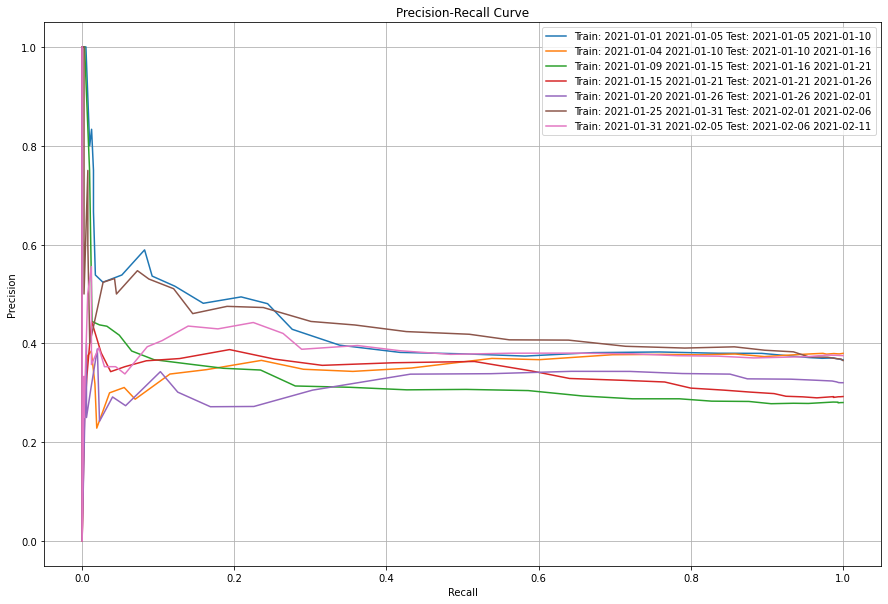

In [17]:
model.plot_precision_recall_curve()

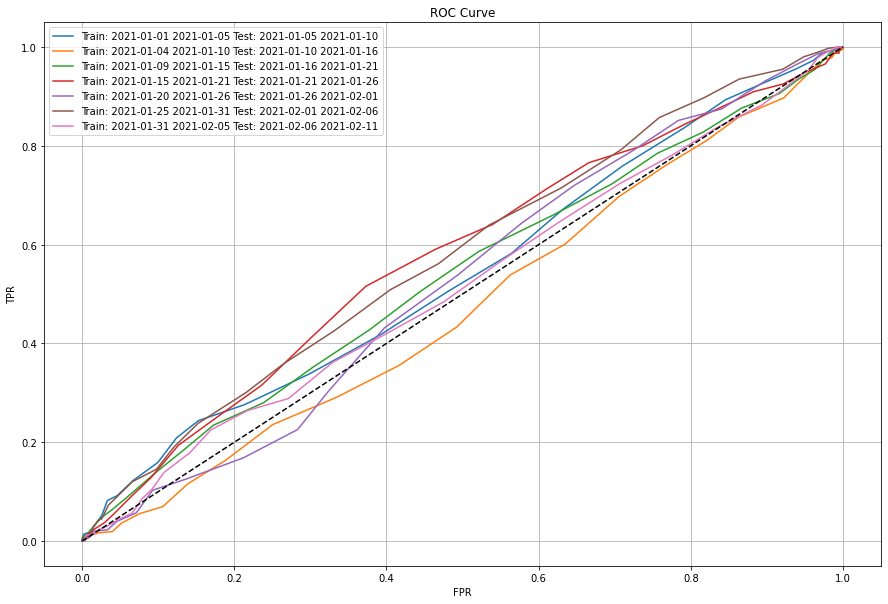

In [16]:
model.plot_roc_curve()

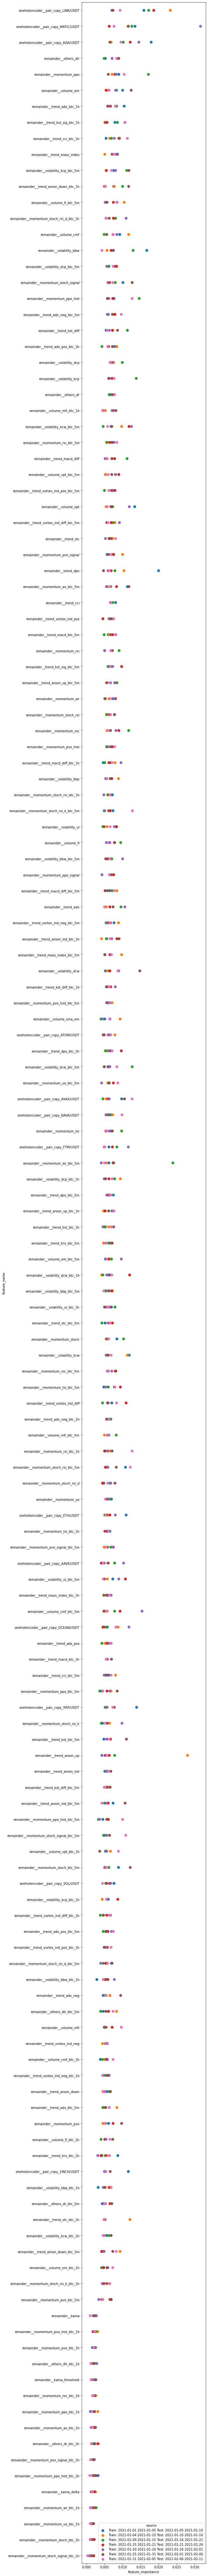

In [18]:
model.plot_feature_importance()

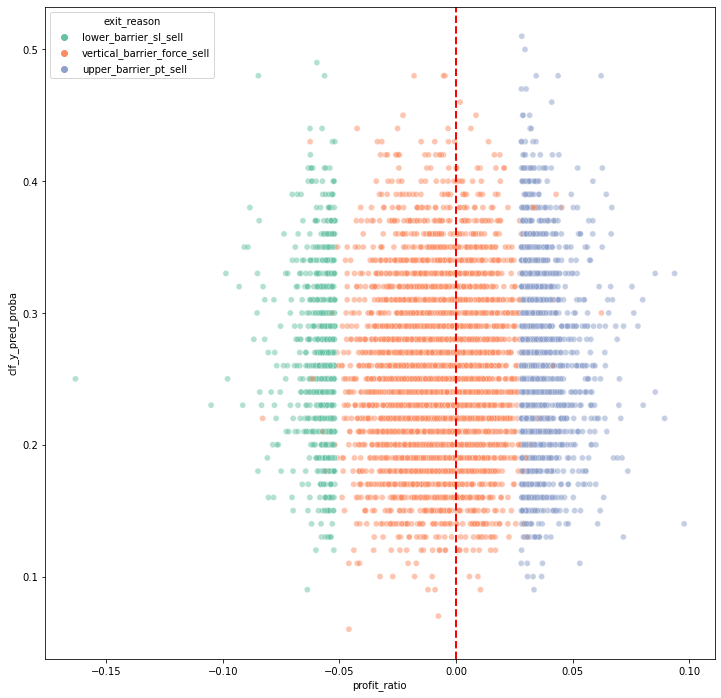

In [19]:
model.plot_probability_returns_scatter()

In [ ]:
model.probability_returns_table()

In [ ]:
model.run_train_on_more_data(date_from='2021-01-01')

In [ ]:
model.plot_feature_importance()

In [ ]:
model.model_threshold_table()

In [ ]:
model.set_model_threshold(model_threshold=0.5)

In [ ]:
model.save_model(filename='VulcanMeta.pkl')

# Appendix / Testing (to be deleted)

In [ ]:
idx = pd.IndexSlice

model.data['clf_y_pred_proba'].sort_index(level='date').plot(figsize=(15, 7))
model.data.loc[idx[:, 'ETH/USDT', :]]['profit_ratio'].sort_index(level='date').plot(secondary_y=True)


In [ ]:
feature_names_out = model.clf['full_transformer']['column_transformer'].get_feature_names_out()
feature_names_out

In [ ]:
transformed_data = model.clf['full_transformer'].transform(model.X_test)
transformed_data

In [ ]:
features_out_df = pd.DataFrame(transformed_data, columns=feature_names_out)
features_out_df

In [ ]:
features_out_df.plot(subplots=True, figsize=(10, 400))

In [ ]:
model.X_test.plot(subplots=True, figsize=(10, 400))

In [ ]:
fracdiff_coeff = model.clf['full_transformer']['column_transformer'].transformers_[1][1].d_
fracdiff_coeff

In [ ]:
import fracdiff

In [ ]:
ff = fracdiff.sklearn.FracdiffStat()

In [ ]:
ff.fit(model.X_test['momentum_ppo_hist_btc_12h'].values.reshape(-1, 1))

In [ ]:
model.X_test['momentum_ppo_hist_btc_12h'].plot()

In [ ]:
ff.d_

In [ ]:
model.clf.named_steps['column_transformer'].get_feature_names_out()

In [ ]:
model.roc_stats